In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import emoji
import string
import nltk
from nltk.corpus import stopwords
import spacy
import re
import time

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('fakeWhatsApp.BR_2018.csv')
df

C:\Users\Miguel António\AppData\Local\Temp\ipykernel_10176\3847491229.py:1: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fakeWhatsApp.BR_2018.csv')


,id,date,hour,timestamp,ddi,country,country_iso3,ddd,state,group,midia,url,characters,words,types,viral,shares,text,misinformation
0,3631133147603888180,01/08/18,13:13,2018-08-01 13:13:00,55,BRASIL,BRA,17,São Paulo,2018_1,1,0,25,4,4,0,1,<Arquivo de mídia oculto>,-1
1,3631133147603888180,01/08/18,13:24,2018-08-01 13:24:00,55,BRASIL,BRA,17,São Paulo,2018_1,0,0,58,9,9,1,2,O Bolsonaro tem que estar preparado pra respon...,-1
2,3631133147603888180,01/08/18,13:24,2018-08-01 13:24:00,55,BRASIL,BRA,17,São Paulo,2018_1,1,0,25,4,4,0,1,<Arquivo de mídia oculto>,-1
3,-4391661641377612003,01/08/18,13:28,2018-08-01 13:28:00,55,BRASIL,BRA,13,São Paulo,2018_1,0,0,5,1,1,0,1,Boaaa,-1
4,-4391661641377612003,09/08/18,14:46,2018-08-09 14:46:00,55,BRASIL,BRA,13,São Paulo,2018_1,1,0,25,4,4,0,1,<Arquivo de mídia oculto>,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282596,-3459365403520904542,28/10/18,21:48,2018-10-28 21:48:00,?,?,?,?,?,2018_59,1,0,25,4,4,0,1,<Arquivo de mídia oculto>,-1
282597,-3459365403520904542,28/10/18,22:06,2018-10-28 22:06:00,?,?,?,?,?,2018_59,1,0,25,4,4,0,1,<Arquivo de mídia oculto>,-1
282598,-3459365403520904542,28/10/18,22:08,2018-10-28 22:08:00,?,?,?,?,?,2018_59,1,0,25,4,4,0,1,<Arquivo de mídia oculto>,-1
282599,-3459365403520904542,28/10/18,22:12,2018-10-28 22:12:00,?,?,?,?,?,2018_59,1,0,25,4,4,0,1,<Arquivo de mídia oculto>,-1


- Only viral menssages from non midiatic sources

In [4]:
df = df[df['viral'] == 1]
df = df[df['midia'] == 0]

- We came from 282601 rows to 20872

In [5]:
print(df.head)

<bound method NDFrame.head of                          id      date   hour            timestamp ddi country  \
1       3631133147603888180  01/08/18  13:24  2018-08-01 13:24:00  55  BRASIL   
15      3631133147603888180  10/08/18  14:31  2018-08-10 14:31:00  55  BRASIL   
26     -4391661641377612003  11/08/18  19:28  2018-08-11 19:28:00  55  BRASIL   
43      3631133147603888180  15/08/18  19:23  2018-08-15 19:23:00  55  BRASIL   
103    -4391661641377612003  22/08/18  22:11  2018-08-22 22:11:00  55  BRASIL   
...                     ...       ...    ...                  ...  ..     ...   
282555   807720138466692852  28/10/18  01:00  2018-10-28 01:00:00   ?       ?   
282556 -8115822708746651359  28/10/18  01:01  2018-10-28 01:01:00   ?       ?   
282558   807720138466692852  28/10/18  02:07  2018-10-28 02:07:00   ?       ?   
282564   807720138466692852  28/10/18  06:42  2018-10-28 06:42:00   ?       ?   
282565   807720138466692852  28/10/18  07:40  2018-10-28 07:40:00   ?       ?  

- Elimination of data there was classified with misinformation = -1

In [6]:
df = df[df["misinformation"] != -1]

- Looking the data

- Misinformation

In [7]:
i = 0
for message in df[df['misinformation'] == 1]['text'].sample(5):
    print(f"Mensagem: {i}\n")
    print(message)
    print("\n")
    i+=1

Mensagem: 0

Petistas colando cartaz do Bolsonaro nos postes para culpar os eleitores dele compartilhem urgente!’👆🏿👆🏿👆🏿👆🏿


Mensagem: 1

Não sabemos mais em quem confiar...
Bolsonaro e Lula trabalhando juntos👇🏻


Mensagem: 2

PREFEITO DE BREJÃO  EM PERNAMBUCO ameaçando funcionários que não votarem em Haddad

E viva a democracia!!!


Mensagem: 3

*A defensora de bandidos resolveu agir.*

A deputada federal do PT, Maria do Rosário enviou um advogado especialista para representar Adelino Bispo de Oliveira, autor do atentando contra o candidato a presidência da República Jair Bolsonaro.

Em entrevista, Maria do Rosário disse que o homem tem claros problemas psicológicos e não deve responder como criminoso, mas sim como pessoa especial com problemas mentais.

A deputada ainda disse que nada de grave aconteceu ao deputado, e que tudo foi um exagero da mídia.

*"Ele recebeu um arranhão na barriga e tão fazendo esse alvoroço todo, me poupe. Sinceramente, acho que ele ta rindo da cara dos troux

- Non misinformation

In [8]:
i = 0
for message in df[df['misinformation'] == 0]['text'].sample(5):
    print(f"Mensagem: {i}\n")
    print(message)
    print("\n")
    i+=1

Mensagem: 0

Olha esse áudio aí do Ronaldo Caiado lá de Goiás


Mensagem: 1

Muito interessante: A belíssima e inesquecível canção FIBRA DE HERÓI, cuja letra emociona a todos que cantam ou escutam, que nos parece tão atual, na verdade é bem antiga. Vejam esse vídeo com a canção, na sua forma original, cantada por Sylvio Caldas em 1942


Mensagem: 2

Eu votar no Ciro ele falou q vai tirar todo mundo do SPC😎😎😎😎😎😎👉🏽👉🏽


Mensagem: 3

Entre já no grupo da página do Facebook : *Bolsonaro Tocantins*.

Envie fotos e vídeos que você deseje que seja publicado na página.

Acompanhe o mito por onde ele estiver.

Junte se as mobilizações espalhadas pelo estado.

Entre através do link 👇

https://chat.whatsapp.com/IKum0Hvjqw3HjGIHmFMinD


Mensagem: 4

QUEM TIVER INTERESSE EM PAGA *BOLETOS ,FATURA DE CARTAO DE CRÉDITO, AGUA & LUZ , SKY , OI TV , CLARO TV , AVON,NATURA*, TODOS A 50%  DO VALOR VEM PV!!
VOCE SO PAGA APOS COMPROVANTE DE *PAGAMENTO*

*SOMENTE INTERESSADOS*




- Corpus statistics

In [9]:
df.describe()[['characters','words','shares']]

,characters,words,shares
count,18951.000000,18951.000000,18951.000000
mean,574.501293,87.253390,11.885230
std,929.443834,142.718198,16.573243
min,38.000000,10.000000,2.000000
25%,132.000000,19.000000,2.000000
50%,222.000000,33.000000,5.000000
75%,551.000000,85.000000,13.000000
max,15683.000000,2664.000000,91.000000


- Removing duplicates

In [10]:
df = df.drop_duplicates(subset=['text'])

- Definition of X and y

In [11]:
texts = df[df['midia'] == 0]['text']
y = df[df['midia'] == 0]['misinformation']

data after remove duplicates


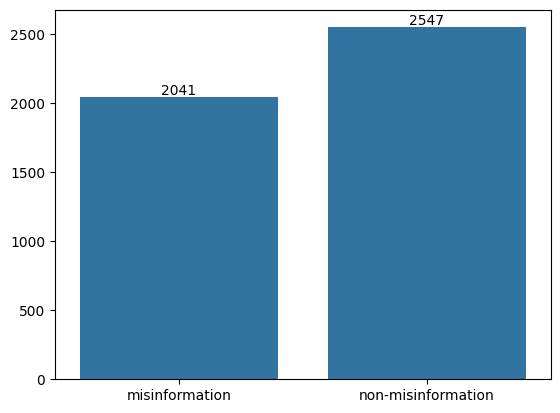

In [12]:
print('data after remove duplicates')
pos_mask = y == 1 
pos = y[pos_mask]
neg_mask = y == 0 
neg = y[neg_mask]
values = [pos.shape[0],neg.shape[0]]
keys = ['misinformation', 'non-misinformation']
g = sns.barplot(x = keys, y = values)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')

- Lenght of the data used

In [13]:
print(len(texts))
print(len(y))

4588
4588


- Misinformation column statistics

In [14]:
df.columns

Index(['id', 'date', 'hour', 'timestamp', 'ddi', 'country', 'country_iso3',
       'ddd', 'state', 'group', 'midia', 'url', 'characters', 'words', 'types',
       'viral', 'shares', 'text', 'misinformation'],
      dtype='object')

In [15]:
def avgSizeWords(string):
     list_string = string.split()
     chars = np.array([len(s) for s in list_string])
     return chars.mean()    
df['types'] = [len(set(t.split())) for t in df['text']]
df['types/token ratio'] = df['types']/df['words']
df['char/word ratio'] = df['characters']/df['words']
df['average chars by word'] = [avgSizeWords(t) for t in df['text']]

In [16]:
mis = df[df['misinformation']==1][['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word','shares']].mean().to_frame().rename(columns={0: "misinformation"})
non_mis = df[df['misinformation']==0][['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word','shares']].mean().to_frame().rename(columns={0: "non-misinformation"})
mis.join(non_mis, lsuffix='_misinformation', rsuffix='_non-misinformation')

,misinformation,non-misinformation
words,113.870652,60.044366
types,78.719255,44.574401
types/token ratio,0.845943,0.899166
characters,719.406663,408.918728
char/word ratio,6.590809,7.231410
average chars by word,5.529126,6.174667
shares,4.974032,3.454653


- Train/Test split

In [17]:
texts_train, texts_test, y_train, y_test = train_test_split(texts,y,test_size=0.2,stratify=y,random_state=42)

- Pre-processing

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Miguel
[nltk_data]     António\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
#emojis and punctuation
emojis_list = list(emoji.EMOJI_DATA.keys())
emojis_list += ['\n']
punct = list(string.punctuation) + ['\n']
emojis_punct = emojis_list + punct

def processEmojisPunctuation(text, remove_punct = False, remove_emoji = False):
    '''
    Put spaces between emojis. Removes punctuation.
    '''
    #get all unique chars
    chars = set(text)
    #for each unique char in text, do:
    for c in chars:
        
        if remove_punct: #remove punctuation            
            if c in punct: 
                text = text.replace(c, ' ')
        else: #put spaces between punctuation
            if c in punct:
                text = text.replace(c, ' ' + c + ' ')
        
        if remove_emoji: #remove emojis
            if c in emojis_list:
                text = text.replace(c, ' ')
        else: #put spaces between emojis
            if c in emojis_list:
                text = text.replace(c, ' ' + c + ' ')                        
            
    text = re.sub(' +', ' ', text)
    return text

#stop words removal
stop_words = list(stopwords.words('portuguese'))
new_stopwords = ['aí','pra','vão','vou','onde','lá','aqui',
                 'tá','pode','pois','so','deu','agora','todo',
                 'nao','ja','vc', 'bom', 'ai','ta', 'voce', 'alguem', 'ne', 'pq',
                 'cara','to','mim','la','vcs','tbm', 'tudo']
stop_words = stop_words + new_stopwords
final_stop_words = []
for sw in stop_words:
    sw = ' '+ sw + ' '
    final_stop_words.append(sw)

def removeStopwords(text):
    for sw in final_stop_words:
        text = text.replace(sw,' ')
    text = re.sub(' +',' ',text)
    return text

#lemmatization
nlp = spacy.load('pt_core_news_sm')
def lemmatization(text):
    doc = nlp(text)
    for token in doc:
        if token.text != token.lemma_:
            text = text.replace(token.text, token.lemma_)
    return text
    

def domainUrl(text):
    '''
    Substitutes an URL in a text for the domain of this URL
    Input: an string
    Output: the string with the modified URL
    '''    
    if 'http' in text:
        re_url = '[^\s]*https*://[^\s]*'
        matches = re.findall(re_url, text, flags=re.IGNORECASE)
        for m in matches:
            domain = m.split('//')
            domain = domain[1].split('/')[0]
            text = re.sub(re_url, domain, text, 1)
        return text
    else:
        return text
    
def processLoL(text):
    re_kkk = 'kkk*'
    t = re.sub(re_kkk, "kkk", text, flags=re.IGNORECASE)
    return t

def firstSentence(text):
    list_s = re.split('; |\. |\! |\? |\n',text)
    for s in list_s:
        if s is not None:
            return s
    

def preprocess(text,semi=False, rpunct = False, remoji = False, sentence = False):
    if sentence:
        text = firstSentence(text) # remove
    text = text.lower().strip()
    text = domainUrl(text)
    text = processLoL(text)
    text = processEmojisPunctuation(text,remove_punct = rpunct, remove_emoji=remoji)
    if semi:        
        return text
    text = removeStopwords(text)
    text = lemmatization(text)
    return text
           

In [20]:
texts = df['pre_processed_text'] = [preprocess(t, sentence = True) for t in texts]

- Only retain one hundred words for each text

In [21]:
def trucateText(text):
    words = text.split()
    if len(words) <= 100:
        return text
    else:
        words = words[0:100]
        text = ' '.join(words)
        return text

In [22]:
texts = [trucateText(t) for t in texts]

- Vectorization

In [23]:
vectorization = ['tfidf-']
ngrams = ['unigram_bigram_trigram']
processed = ['-pre_processed']
max_features = ['']#,'-max_features']
balancing = ['-oversampling']
experiments = []

for vec in vectorization:
    for ng in ngrams:
        for p in processed:
            for m in max_features:
                exp = vec+ng+p+m
                experiments.append(exp)

print(len(experiments))
experiments


1


['tfidf-unigram_bigram_trigram-pre_processed']

In [24]:
def defineVectorizing(experiment):
    max_feat = None
    # maximum number of features
    if 'max_features' in experiment:
        max_feat = 5000
    exp_parts = experiment.split('-')
    vec = exp_parts[0]
    ngram = exp_parts[1]
    # ngram
    if ngram == 'unigram':
        ng = (1,1)
    elif ngram == 'unigram_bigram':
        ng = (1,2)
    elif ngram == 'unigram_bigram_trigram':
        ng = (1,3)
    # vectorizer
    if vec == 'bow':
        vectorizer = CountVectorizer(max_features = max_feat, binary=True, ngram_range = ng, lowercase = False, token_pattern = r'[^\s]+')
    elif vec == 'tfidf':
        vectorizer = TfidfVectorizer(max_features = max_feat, ngram_range = ng, lowercase = False, token_pattern = r'[^\s]+')
    
    return vectorizer

def vectorizing(vectorizer,texts_train,texts_test):
    vectorizer.fit(texts_train)   
    X_train = vectorizer.transform(texts_train)
    X_test = vectorizer.transform(texts_test)
    #print('Train:',X_train.shape)
    #print('Test:',X_test.shape)
    return X_train, X_test

vectorizer = defineVectorizing(experiments[0])
X_train,X_test = vectorizing(vectorizer,texts_train,texts_test)

- Models Train and Test

In [25]:
models = ['lr','nb','lsvm','sgd', 'svm', 'knn', 'rf', 'gb', 'mlp']
print(len(models))
models

9


['lr', 'nb', 'lsvm', 'sgd', 'svm', 'knn', 'rf', 'gb', 'mlp']

In [26]:
def getTestMetrics(y_true, y_pred, y_prob=None, full_metrics=False):
    # Importar funções sklearn com apelidos locais
    from sklearn.metrics import (
        accuracy_score as sk_accuracy,
        precision_score as sk_precision,
        recall_score as sk_recall,
        f1_score as sk_f1,
        roc_auc_score as sk_roc_auc
    )
    import numpy as np

    acc = sk_accuracy(y_true, y_pred)
    precision = sk_precision(y_true, y_pred, average='macro')
    recall = sk_recall(y_true, y_pred, average='macro')
    f1 = sk_f1(y_true, y_pred, average='macro')

    try:
        roc_auc = sk_roc_auc(y_true, y_prob, multi_class='ovr')
    except Exception:
        roc_auc = np.nan

    # placeholders para compatibilidade
    precision_neg = recall_neg = f1_neg = np.nan

    if full_metrics:
        print(f"Accuracy: {acc:.3f}")
        print(f"Precision (macro): {precision:.3f}")
        print(f"Recall (macro): {recall:.3f}")
        print(f"F1 (macro): {f1:.3f}")
        print(f"AUC: {roc_auc:.3f}")

    return acc, precision, precision_neg, recall, recall_neg, f1, f1_neg, roc_auc


In [32]:
def lr_eval(X_train, y_train, X_test, y_test):
    print('=== Logistic Regression ===')
    logreg = LogisticRegression().fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_prob = logreg.predict_proba(X_test)[:, 1]
    metrics = getTestMetrics(y_test, y_pred, y_prob, full_metrics=True)
    return logreg, metrics


def nb_eval(X_train, y_train, X_test, y_test):
    if 'bow' in experiments[0]:
        print('=== Bernoulli Naive-Bayes ===')
        nb = BernoulliNB().fit(X_train, y_train)
    elif 'tfidf' in experiments[0]:
        print('=== Complement Naive-Bayes ===')
        nb = ComplementNB().fit(X_train, y_train)
    else:
        nb = BernoulliNB().fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    y_prob = nb.predict_proba(X_test)[:, 1]
    metrics = getTestMetrics(y_test, y_pred, y_prob, full_metrics=True)
    return nb, metrics


def lsvm_eval(X_train, y_train, X_test, y_test):
    print('=== Linear Support Vector Machine ===')
    svm = LinearSVC(dual=False).fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    metrics = getTestMetrics(y_test, y_pred, full_metrics=True)
    return svm, metrics


def sgd_eval(X_train, y_train, X_test, y_test):
    print('=== Linear SVM with SGD training ===')
    sgd = SGDClassifier().fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    metrics = getTestMetrics(y_test, y_pred, full_metrics=True)
    return sgd, metrics


def svm_eval(X_train, y_train, X_test, y_test):
    print('=== SVM with RBF kernel ===')
    svc = SVC(probability=True).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    y_prob = svc.predict_proba(X_test)[:, 1]
    metrics = getTestMetrics(y_test, y_pred, y_prob, full_metrics=True)
    return svc, metrics


def knn_eval(X_train, y_train, X_test, y_test):
    print('=== KNN ===')
    knn = KNeighborsClassifier(weights='distance', n_jobs=-1).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:, 1]
    metrics = getTestMetrics(y_test, y_pred, y_prob, full_metrics=True)
    return knn, metrics


def rf_eval(X_train, y_train, X_test, y_test):
    print('=== Random Forest ===')
    rf = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:, 1]
    metrics = getTestMetrics(y_test, y_pred, y_prob, full_metrics=True)
    return rf, metrics


def gb_eval(X_train, y_train, X_test, y_test):
    print('=== Gradient Boosting ===')
    gb = GradientBoostingClassifier(n_estimators=200).fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    y_prob = gb.predict_proba(X_test)[:, 1]
    metrics = getTestMetrics(y_test, y_pred, y_prob, full_metrics=True)
    return gb, metrics


def mlp_eval(X_train, y_train, X_test, y_test):
    print('=== Multilayer Perceptron ===')
    mlp = MLPClassifier(
        verbose=True, early_stopping=True,
        batch_size=64, n_iter_no_change=5, tol=1e-3
    ).fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    y_prob = mlp.predict_proba(X_test)[:, 1]
    metrics = getTestMetrics(y_test, y_pred, y_prob, full_metrics=True)
    return mlp, metrics


def model_eval(model, X_train, y_train, X_test, y_test):
    if model == 'lr':
        return lr_eval(X_train, y_train, X_test, y_test)
    elif model == 'nb':
        return nb_eval(X_train, y_train, X_test, y_test)
    elif model == 'lsvm':
        return lsvm_eval(X_train, y_train, X_test, y_test)
    elif model == 'sgd':
        return sgd_eval(X_train, y_train, X_test, y_test)
    elif model == 'svm':
        return svm_eval(X_train, y_train, X_test, y_test)
    elif model == 'knn':
        return knn_eval(X_train, y_train, X_test, y_test)
    elif model == 'rf':
        return rf_eval(X_train, y_train, X_test, y_test)
    elif model == 'gb':
        return gb_eval(X_train, y_train, X_test, y_test)
    elif model == 'mlp':
        return mlp_eval(X_train, y_train, X_test, y_test)
    else:
        raise ValueError(f"Modelo '{model}' não reconhecido.")

In [33]:
lr = model_eval('lr',X_train,y_train,X_test,y_test)
nb = model_eval('nb',X_train,y_train,X_test,y_test)
lsvm = model_eval('lsvm',X_train,y_train,X_test,y_test)
sgd = model_eval('sgd',X_train,y_train,X_test,y_test)
knn = model_eval('knn',X_train,y_train,X_test,y_test)
rf = model_eval('rf',X_train,y_train,X_test,y_test)
#gb = model_eval('gb',X_train,y_train,X_test,y_test)
#mlp = model_eval('mlp',X_train,y_train,X_test,y_test)

=== Logistic Regression ===
Accuracy: 0.710
Precision (macro): 0.709
Recall (macro): 0.712
F1 (macro): 0.709
AUC: 0.789
=== Complement Naive-Bayes ===
Accuracy: 0.719
Precision (macro): 0.752
Recall (macro): 0.737
F1 (macro): 0.717
AUC: 0.854
=== Linear Support Vector Machine ===
Accuracy: 0.747
Precision (macro): 0.753
Recall (macro): 0.755
F1 (macro): 0.747
AUC: nan
=== Linear SVM with SGD training ===
Accuracy: 0.737
Precision (macro): 0.746
Recall (macro): 0.747
F1 (macro): 0.737
AUC: nan
=== KNN ===
Accuracy: 0.698
Precision (macro): 0.694
Recall (macro): 0.693
F1 (macro): 0.694
AUC: 0.771
=== Random Forest ===
Accuracy: 0.718
Precision (macro): 0.746
Recall (macro): 0.694
F1 (macro): 0.692
AUC: 0.819


# Experiences

## Experience 1 - Generating LIME explanations for each model predictions and compared the words that appear the most

In [34]:
from lime.lime_text import LimeTextExplainer

def explain_with_lime(model, vectorizer, texts, idx):
    explainer = LimeTextExplainer(class_names=["real", "fake"])
    text_instance = texts.iloc[idx] if hasattr(texts, "iloc") else texts[idx]

    def predict_proba(texts_list):
        X = vectorizer.transform(texts_list)
        if hasattr(model, "predict_proba"):
            return model.predict_proba(X)
        else:
            scores = model.decision_function(X)
            if scores.ndim == 1:
                scores = np.vstack([-scores, scores]).T
            probs = np.exp(scores) / np.exp(scores).sum(axis=1, keepdims=True)
            return probs

    print(f"\nTexto: {text_instance}")
    print("Classe prevista:", model.predict(vectorizer.transform([text_instance]))[0])
    exp = explainer.explain_instance(text_instance, predict_proba, num_features=10)
    exp.show_in_notebook(text=True)
    return exp


trained_models = {
    "LogisticRegression": lr,
    "MultinomialNB": nb,
    "LinearSVC": lsvm,
    "SGDClassifier": sgd,
    "KNN": knn,
    "RandomForest": rf
    #"GradientBoosting": gb,
    #"MLP": mlp
}

idx = 5
for name, model_tuple in trained_models.items():
    print(f"\n🔹=== {name} ===")
    try:
        model = model_tuple[0] if isinstance(model_tuple, tuple) else model_tuple
        exp = explain_with_lime(model,vectorizer,texts_test,idx)
    except Exception as e:
        print(f"Erro com {name}: {e}")



🔹=== LogisticRegression ===

Texto: Governo comprou R$ 23 bilhões em mídia desde 2000 https://exame.abril.com.br/marketing/governo-comprou-r-23-bilhoes-em-midia-desde-2000/?utm_source=whatsapp
Classe prevista: 0
Erro com LogisticRegression: cannot import name 'display' from 'IPython.core.display' (c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\display.py)

🔹=== MultinomialNB ===

Texto: Governo comprou R$ 23 bilhões em mídia desde 2000 https://exame.abril.com.br/marketing/governo-comprou-r-23-bilhoes-em-midia-desde-2000/?utm_source=whatsapp
Classe prevista: 1
Erro com MultinomialNB: cannot import name 'display' from 'IPython.core.display' (c:\Users\Miguel António\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\display.py)

🔹=== LinearSVC ===

Texto: Governo comprou R$ 23 bilhões em mídia desde 2000 https://exame.abril.com.br/marketing/governo-comprou-r-23-bilhoes-em-midia-desde-2000/?utm_source=whatsapp
Classe prev